<a href="https://colab.research.google.com/github/meenabm07/codesoft_05/blob/main/codsoft_05_CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CREDIT CARD FRAUD DETECTION

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt
import seaborn as sns


Load and Explore the Data

In [ ]:
# Load the dataset
data = pd.read_csv('/creditcard.csv')

# Display the first few rows
print(data.head())

# Check for class imbalance
print(data['Class'].value_counts())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

Data Preprocessing

In [ ]:
# Separate the features and the target variable
X = data[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'Amount']]
y = data['Class']

# Check for missing values
print(X.isnull().sum())

# Handle missing values by replacing them with the mean of the column
X.fillna(X.mean(), inplace=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Time      0
V1        0
V2        0
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
Amount    1
dtype: int64


<ipython-input-6-fb68665e8e6b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [ ]:
# Ensure target variable has no NaN values
y = y.fillna(0).astype(int)


Handle Class Imbalance

In [ ]:
# Use SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


Split the Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


Train the Model

In [ ]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Evaluate the Model

Logistic Regression:
Precision: 0.9937421777221527
Recall: 1.0
F1-score: 0.9968612680477087
Random Forest:
Precision: 1.0
Recall: 1.0
F1-score: 1.0


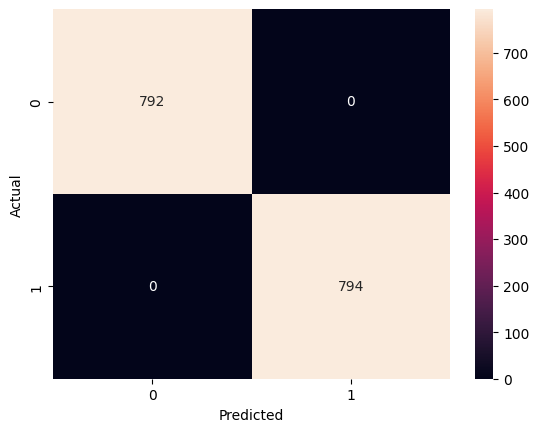

In [ ]:
# Predict using Logistic Regression
lr_predictions = lr_model.predict(X_test)

# Predict using Random Forest
rf_predictions = rf_model.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression:")
print(f"Precision: {precision_score(y_test, lr_predictions)}")
print(f"Recall: {recall_score(y_test, lr_predictions)}")
print(f"F1-score: {f1_score(y_test, lr_predictions)}")

# Evaluate Random Forest
print("Random Forest:")
print(f"Precision: {precision_score(y_test, rf_predictions)}")
print(f"Recall: {recall_score(y_test, rf_predictions)}")
print(f"F1-score: {f1_score(y_test, rf_predictions)}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
